## Capstone Project

### Problem Statement
Semiconductor manufacturing is one of the world's most expensive and the most complicated manufacturing processes. It takes over USD15 to USD20 Billion to build a new state-of-the-art semiconductor fabrication facility (called fab, in short) and almost two years of construction time. The upkeep of the fab costs USD1 to USD2 Billion purely for maintenance and operations, not counting raw materials. The manufacturing process is also highly complex, with more than 2000 steps to fabricate a single wafer. Hence, the fab processes are highly monitored, and petabytes of data are generated for metrology and other actions every week in a modern fab. 

Given this, high yields in the fab are necessary. The data from the monitors (often called signals) can be used to determine if a wafer will yield, and this can be done at all stages of the fab flow. Early detection of faulty wafers can prevent them from going through later steps, thus saving time and costs and improving yield. 

The problem I will address in the Capstone project is how to predict the signals that are significant in determining the pass/fail of a wafer and build a model to classify the wafers based on the signals. 

I chose this problem as it is closely related to my area of work. The choice of a manufacturing process and fab for chip design is one of the top five critical questions and can make or break a chip.

### Data Source
The data is from: https://archive.ics.uci.edu/dataset/179/secom
This is the only public data source I could find. There are less than a handful of state-of-the-art semiconductor wafer fabs, and the data is very tightly controlled.

## Data Import
Set the libraries and package import. 
Read the data file and do initial data checks


In [39]:
import random
import numpy as np
import pandas as pd
from pandas import set_option
import warnings
import time

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import plotly.express as px

from sklearn.metrics import confusion_matrix, auc, roc_curve, accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score

from scipy import stats

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

from statsmodels.stats.outliers_influence import variance_inflation_factor


warnings.filterwarnings('ignore')
warnings.warn("this will not show")
# from xgboost.sklearn import XGBClassifier


In [40]:
df = pd.read_csv("uci-secom.csv")
df

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [41]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [42]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


In [43]:
df.info

<bound method DataFrame.info of                      Time        0        1          2          3       4  \
0     2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  2008-10-16 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  2008-10-16 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  2008-10-17 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  2008-10-17 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  2008-10-17 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7       8  ... 

## Data Preparation

In [44]:
# Dataframe has 1567 rows and 592 columns.
# This is a classification exercise and not a time-series analysis
# So the 'Time' feature will not contribute anything, drop it
# Dataframe now has 1567 rows and 591 columns.

df = df.drop(['Time'],axis=1)
print(df.shape)

(1567, 591)


Number of features with Null Entries > 0.6: 24


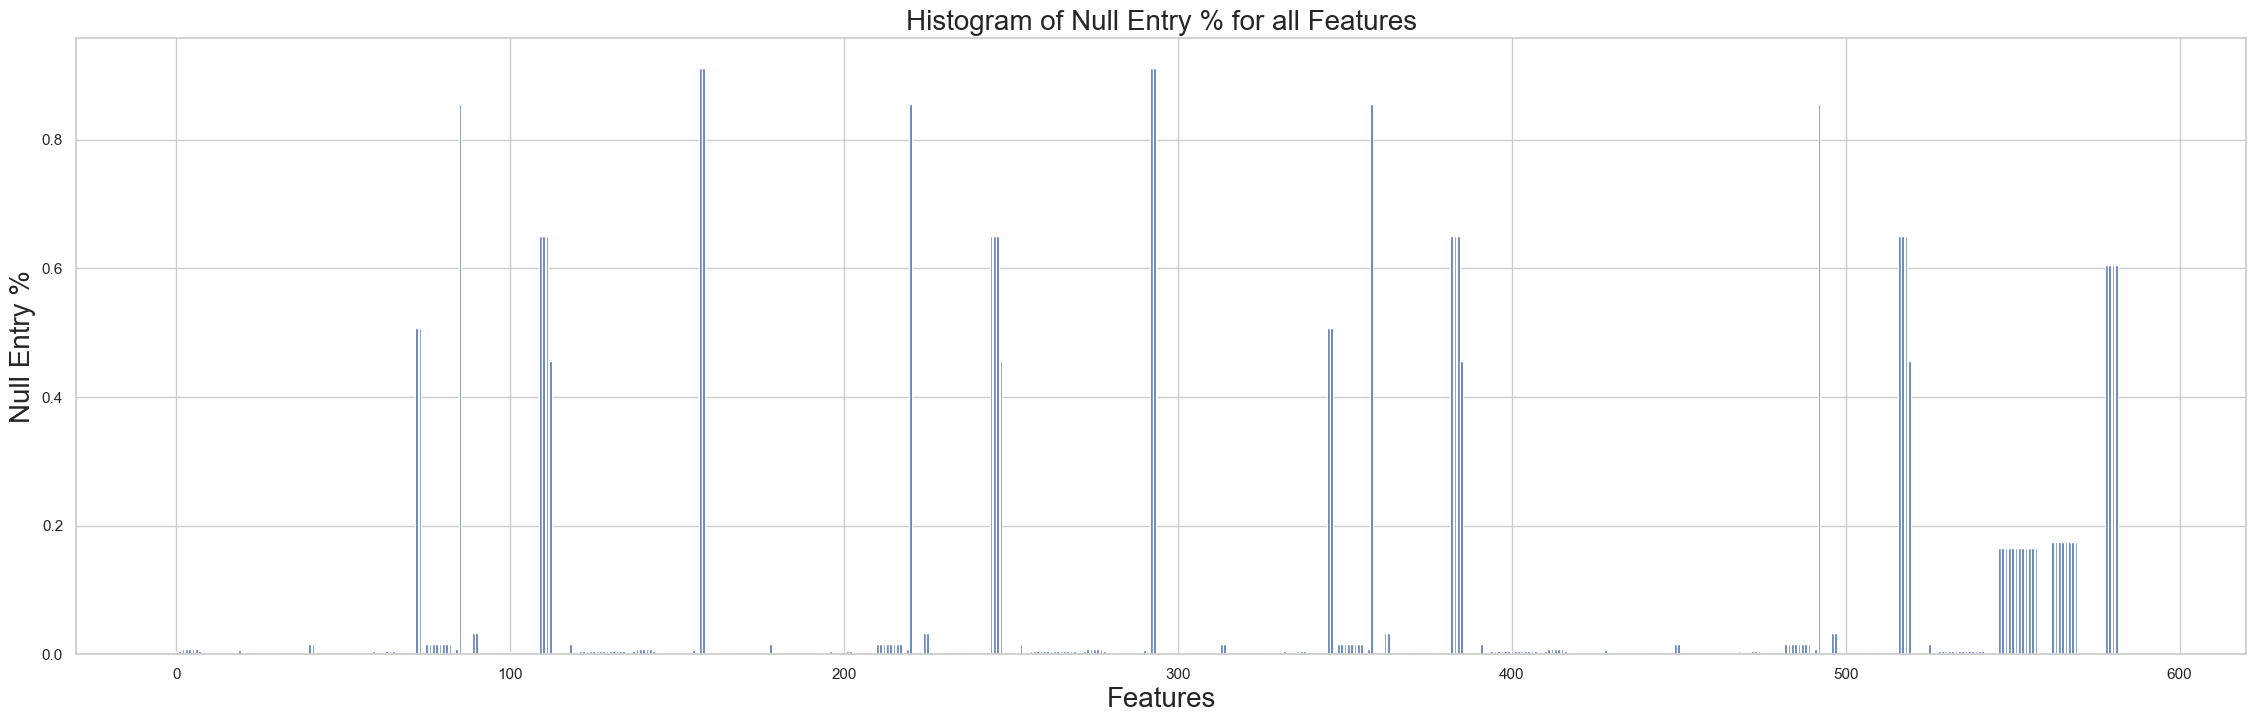

In [45]:
# Next check how many features are dominated by null values and drop those

missing = df.isnull().sum().reset_index().rename(columns={0:'NullCount'})
missing['NullEntries'] = missing['NullCount']/df.shape[0]
null_gt_60 = (missing['NullEntries'] > 0.6).sum()
print(f"Number of features with Null Entries > 0.6: {null_gt_60}")

fig = plt.figure(figsize=(28,8))
plt.bar(np.arange(missing.shape[0]), list(missing.NullEntries.values))
plt.title('Histogram of Null Entry % for all Features', fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Null Entry %', fontsize=20)
plt.show()

In [46]:
# Drop the features with null entries > 60% 
empty = missing[missing['NullEntries'] > 0.6]['index'].values
df = df.drop(empty,axis=1)
df.shape

(1567, 567)

In [47]:
# df.head()

In [48]:
print("Total Number of remaining Null values = ", (df.isnull().sum()).sum(), "out of ", 1567*567, (df.isnull().sum()).sum()*100/(1567*567), "%")

Total Number of remaining Null values =  14859 out of  888489 1.6723898663911427 %


In [49]:
# Fill missing values through imputation
# knn =  KNNImputer(n_neighbors=5)
# impute = knn.fit_transform(df)
# df_impute = pd.DataFrame(impute, columns = df.columns)
# df_impute.head()

# Ideally, the KNNImputer above should work. But it is failing and I ran out of time...
# So using simpler fill methods : fill with latest information available
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
df

print("Total Number of remaining Null values = ", (df.isnull().sum()).sum(), "out of ", 1567*567, (df.isnull().sum()).sum()*100/(1567*567), "%")

Total Number of remaining Null values =  0 out of  888489 0.0 %


In [50]:
# Check if there are any features that contain only one value,if so remove those. 
column_with_one_value = []
for column in df.columns:
    if df[column].nunique() == 1:
            column_with_one_value.append(column)
print ("No of columns with one value", len(column_with_one_value))
# Now remove them
df = df.drop(axis=1, columns=column_with_one_value)
df.shape

No of columns with one value 116


(1567, 451)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 451 entries, 0 to Pass/Fail
dtypes: float64(450), int64(1)
memory usage: 5.4 MB


##### We now have cleaner records than before. All values are metric and not NA values.
##### - We have 1567 rows and 451 columns before modeling
##### Start EDA (Exploratory Data Analysis)

## Exploratory Data Analysis

### Data Analysis and Changes
Check duplicates and drop if any  
Address outliers  
Do label encoding  
Change Pass/Fail column to Fail and encode  
Check balance of target  
Look for correlation between data  
Address collinearity  


In [52]:
# Check duplicates and drop if any
df.duplicated().sum()

0

In [53]:
df.shape

(1567, 451)

In [54]:
# Address outliers. The data set only has a few thousand outliers
# for each columns compute the zscore and replace the values > zscore with the mean of the column
# One could also compute the IQR

df_before_clean = df.copy()
print("\nBefore cleaning:")
print(df.describe())

threshold = 3
for column in df.columns:
    z_scores = np.abs(stats.zscore(df[column]))
    outliers = df[column][z_scores > threshold]
    if len(outliers) > 0:
        # print(f"Column {column}: {len(outliers)} outliers found")
        column_mean = df[column].mean()
        df.loc[z_scores > threshold, column] = column_mean
print("\nAfter cleaning:")
print(df.describe())

changes = (df != df_before_clean).sum().sum()
print(f"\nTotal number of values replaced: {changes}")
df.shape


Before cleaning:
                 0            1            2            3            4  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000   
mean   3014.319036  2495.871710  2200.644590  1397.732432     4.172395   
std      73.633717    80.313637    29.470551   441.432210    56.103684   
min    2743.240000  2158.750000  2060.660000     0.000000     0.681500   
25%    2966.325000  2452.400000  2181.044400  1082.634750     1.017700   
50%    3011.320000  2499.460000  2201.066700  1287.353800     1.316800   
75%    3056.540000  2538.885000  2218.055500  1591.223500     1.529100   
max    3356.350000  2846.440000  2315.266700  3715.041700  1114.536600   

                 6            7            8            9           10  ...  \
count  1567.000000  1567.000000  1567.000000  1567.000000  1567.000000  ...   
mean    101.084482     0.121832     1.462842    -0.000848     0.000142  ...   
std       6.268970     0.008937     0.073853     0.015108     0.009300  ...   

(1567, 451)

<Axes: ylabel='556'>

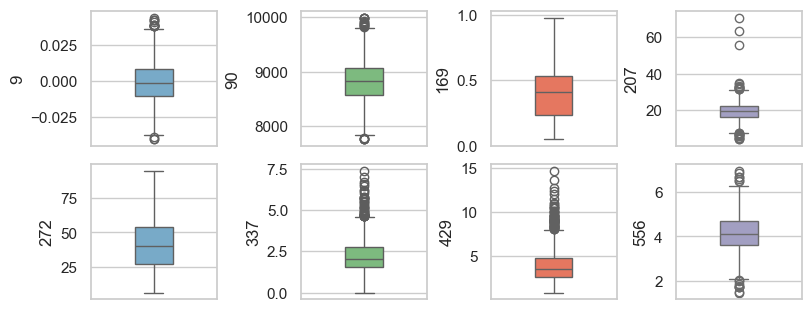

In [55]:
# plot few random columns to check that the values have no outliers 
sns.set(style="whitegrid")
fig, ax = plt.subplots(2,4,constrained_layout=True, figsize=(8, 3))

sns.boxplot(y = df.iloc[:,8],palette="Blues", width=0.3,ax=ax[0,0])
sns.boxplot(y = df.iloc[:,83],palette="Greens", width=0.3,ax=ax[0,1])
sns.boxplot(y = df.iloc[:,154],palette="Reds", width=0.3,ax=ax[0,2])
sns.boxplot(y = df.iloc[:,183],palette="Purples", width=0.3,ax=ax[0,3])
sns.boxplot(y = df.iloc[:,219],palette="Blues", width=0.3,ax=ax[1,0])
sns.boxplot(y = df.iloc[:,270],palette="Greens", width=0.3,ax=ax[1,1])
sns.boxplot(y = df.iloc[:,333],palette="Reds", width=0.3,ax=ax[1,2])
sns.boxplot(y = df.iloc[:,420],palette="Purples", width=0.3,ax=ax[1,3])

In [56]:
# change the column name to Pass_Fail ("/" does not work well)
# Seperate the df into feature and target dataframes

df.rename(columns={'Pass/Fail': 'Pass_Fail'}, inplace=True)

In [57]:
df_feature = df.drop(['Pass_Fail'],axis = 1)
df_target = df[['Pass_Fail']]

print("Feature shape ", df_feature.shape, " Type ", type(df_feature))
print("Target shape ", df_target.shape, " Type ", type(df_target))
print("Target column name", df_target.columns)
df['Pass_Fail'].head()

Feature shape  (1567, 450)  Type  <class 'pandas.core.frame.DataFrame'>
Target shape  (1567, 1)  Type  <class 'pandas.core.frame.DataFrame'>
Target column name Index(['Pass_Fail'], dtype='object')


0   -1.000000
1   -1.000000
2   -0.867262
3   -1.000000
4   -1.000000
Name: Pass_Fail, dtype: float64

In [58]:
df_target.head()

,Pass_Fail
0,-1.000000
1,-1.000000
2,-0.867262
3,-1.000000
4,-1.000000


In [59]:
# CSV has 1 : Fail, -1 : Pass. This has to be changed to 1 : Fail and 0 : Pass
# Map -1 to 0 and  all else to 1
df_target = df_target.replace({-1:0})
df_target.head()


,Pass_Fail
0,0.000000
1,0.000000
2,-0.867262
3,0.000000
4,0.000000


In [60]:
df_target = df_target.where(df_target.isin([0, 1]), 1)
df_target.head()

,Pass_Fail
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


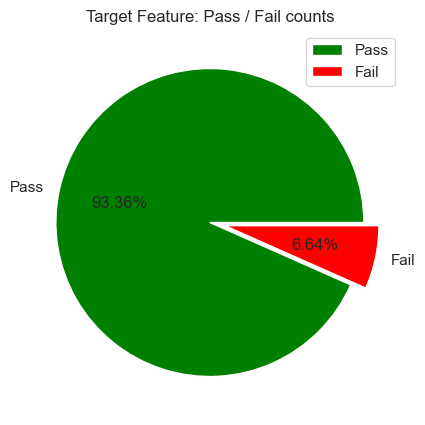

The target has highly imbalanced class  Pass_Fail
0.0          1463
1.0           104
Name: count, dtype: int64


In [61]:
labels = ['Pass', 'Fail']
size = df_target.value_counts()
colors = ['green', 'red']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (5 ,5)
plt.pie(size, labels = labels, colors = colors, explode = explode, autopct = "%.2f%%", shadow = False)
plt.axis('off')
plt.title('Target Feature: Pass / Fail counts', fontsize = 12)
plt.legend()
plt.show()
print("The target has highly imbalanced class ", size)

In [62]:
df_feature.shape
df_feature = df_feature.reset_index(drop=True)

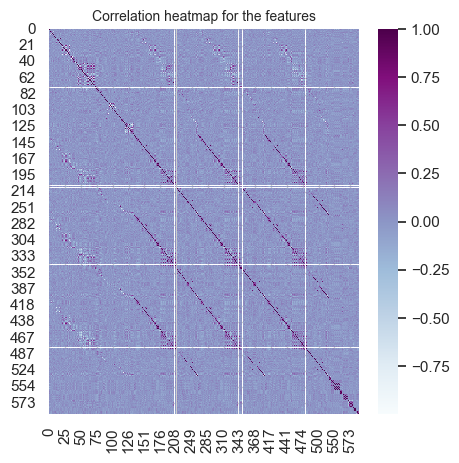

In [63]:
plt.clf()
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(df_feature.iloc[0:450, 0:450].corr(), cmap = 'BuPu')
plt.title('Correlation heatmap for the features', fontsize = 10)
plt.show()

In [64]:
# Now check the variance
variance = df_feature.var(axis=0, skipna=True, ddof=1, numeric_only=True)
print(variance)

0        4720.556228
1        5375.475139
2         741.726857
3      128035.573418
4           0.192264
           ...      
585         1.029715
586         0.000118
587         0.000054
588         0.000006
589      4186.116703
Length: 450, dtype: float64


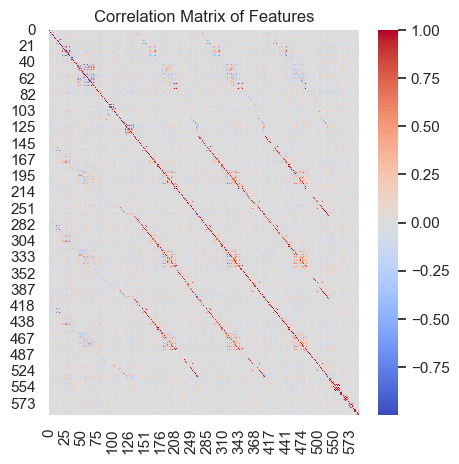

Working on high correlations Org...
Working on VIF Org...

Variance Inflation Factors:
    Feature       VIF
68       74       inf
280     347       inf
372     478       inf
182     206       inf
185     209       inf
..      ...       ...
390     499  1.468097
324     419  1.428782
375     482  1.410445
393     511  1.388198
323     418  1.377063

[450 rows x 2 columns]
Dropping 224 collinear features: 18, 25, 26, 27, 30, 31, 36, 46, 50, 51, 54, 56, 60, 62, 65, 66, 70, 74, 96, 98, 101, 104, 105, 106, 123, 124, 127, 130, 147, 153, 154, 169, 174, 187, 201, 202, 203, 206, 209, 249, 250, 254, 270, 271, 272, 273, 274, 275, 277, 278, 279, 280, 281, 282, 283, 285, 286, 287, 288, 289, 290, 291, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 316, 317, 318, 319, 320, 321, 323, 324, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 359, 360, 361, 362, 363, 365, 366, 376, 37

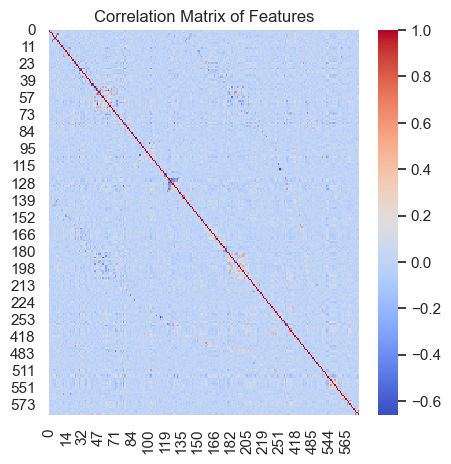

Working on high correlations Rem...
Working on VIF Rem...

Variance Inflation Factors after removal:
    Feature       VIF
37       48  8.250633
43       61  6.575779
35       45  6.437927
44       63  6.112644
86      121  5.916940
..      ...       ...
60       84  1.181221
181     419  1.171971
200     511  1.167263
180     418  1.164775
222     583  1.162409

[226 rows x 2 columns]

Original number of features: 450
Number of features after removing collinearity: 226


In [65]:
# Identify and remove 
def plot_correlation_matrix(df):
    corr = df.corr()
    plt.figure(figsize=(5, 5))
    sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f')
    plt.title('Correlation Matrix of Features')
    plt.show()

def print_high_correlations(df, threshold=0.7):
    corr = df.corr()
    high_corr = np.where(np.abs(corr) > threshold)
    high_corr_list = [(corr.index[x], corr.columns[y], corr.iloc[x, y]) 
                      for x, y in zip(*high_corr) if x != y and x < y]
    # Commenting this out - as this is a really long list
    # print("Highly correlated pairs:")
    # for pair in high_corr_list:
        # print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")

def calculate_vif(df):
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df_scaled.columns
    vif_data["VIF"] = [variance_inflation_factor(df_scaled.values, i) 
                       for i in range(df_scaled.shape[1])]
    return vif_data.sort_values('VIF', ascending=False)

def remove_collinear_features(df, threshold=0.7):
    corr = df.corr()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
    
    print(f"Dropping {len(to_drop)} collinear features: {', '.join(to_drop)}")
    return df.drop(columns=to_drop)

# Original analysis
plot_correlation_matrix(df_feature)
print("Working on high correlations Org...")
print_high_correlations(df_feature)
print("Working on VIF Org...")
vif_results = calculate_vif(df_feature)
print("\nVariance Inflation Factors:")
print(vif_results)

# Remove collinear features
df_feature_reduced = remove_collinear_features(df_feature)

# Analysis after removing collinear features
print("\nAfter removing collinear features:")
plot_correlation_matrix(df_feature_reduced)
print("Working on high correlations Rem...")
print_high_correlations(df_feature_reduced)
print("Working on VIF Rem...")
vif_results_reduced = calculate_vif(df_feature_reduced)
print("\nVariance Inflation Factors after removal:")
print(vif_results_reduced)

print(f"\nOriginal number of features: {df_feature.shape[1]}")
print(f"Number of features after removing collinearity: {df_feature_reduced.shape[1]}")

In [66]:
df_feature_reduced.shape

(1567, 226)

In [67]:
# Identify and remove features with very high variance

In [68]:
# move the feature and target data frames to X and y DF (just standard notation, I suppose!)
X = df_feature_reduced
y = df_target

# getting the shapes of new data sets x and y
print("shape of X:", X.shape)
print("shape of y:", y.shape)
print("X : ", type(X), "Y : ", type(y))

shape of X: (1567, 226)
shape of y: (1567, 1)
X :  <class 'pandas.core.frame.DataFrame'> Y :  <class 'pandas.core.frame.DataFrame'>


In [69]:
# Split X and y to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)  # seed for comparable results
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("shape of y_train: ", y_train.shape)
print("shape of y_test: ", y_test.shape)
print("X_train : ", type(X_train), "Y_train : ", type(y_train))
print("X_test : ", type(X_test), "Y_test : ", type(y_test))

shape of X_train:  (1175, 226)
shape of X_test:  (392, 226)
shape of y_train:  (1175, 1)
shape of y_test:  (392, 1)
X_train :  <class 'pandas.core.frame.DataFrame'> Y_train :  <class 'pandas.core.frame.DataFrame'>
X_test :  <class 'pandas.core.frame.DataFrame'> Y_test :  <class 'pandas.core.frame.DataFrame'>


In [70]:
# Normalize X train and test with Standard Scalar 
sc = StandardScaler().set_output(transform="pandas")

# fitting independent data to the model
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print("shape of X_train: ", X_train.shape)
print("shape of X_test: ", X_test.shape)
print("X_train : ", type(X_train), "X_test : ", type(X_test))

shape of X_train:  (1175, 226)
shape of X_test:  (392, 226)
X_train :  <class 'pandas.core.frame.DataFrame'> X_test :  <class 'pandas.core.frame.DataFrame'>


## Modeling  

I am using seven classifiers:  
    Dummy Classifier  
    Logistic Regression  
    Decision Tree  
    SVC  
    K-Nearest Neighbor  
    Random Forest  
    Gradient Boost  
    Naive Bayes  
The Dummy Classifier is used as the baseline  

Run these 7+1 classifiers and see if these produce reasonable results without tuning

#### Build useful functions  

We will be running a number of models and generating results output  
Build the functions to define the metrics and plots to print out

True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN)
Accuracy: This metric measures the overall correctness of the model and is calculated as:

Accuracy = (TP + TN) / (TP + TN + FP + FN)
Accuracy measures the overall correctness of the model
Accuracy can be misleading in cases of class imbalance. But we have SMOTE DFs

Precision = (TP) / (TP + FP)
Precision: This metric indicates how many of the predicted positive cases were positive:
High precision means that it is likely correct when a positive prediction is made.

Recall = (TP) / (TP + FN)
Recall (Sensitivity): This metric measures how many actual positive cases were captured by the model:
High recall indicates that the model identified most positive cases.

Specificity = (True Negatives TN) / (True Negatives TN + False Positives FP)
Specificity, also known as the True Negative Rate (TNR), quantifies how well a model can identify negative instances. 
A high specificity indicates that the model correctly classifies most negative cases without mislabeling them as positive.

In [71]:
def confusion_matrix_plot(cm):
  fig, ax = plt.subplots(figsize=(2.5, 2.5))
#  ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
  ax.matshow(cm, cmap=plt.cm.RdYlBu, alpha=0.3)
  for i in range(cm.shape[0]):
      for j in range(cm.shape[1]):
          ax.text(x=j, y=i, s=cm[i,j], va='center', ha='center', fontsize=10)
  plt.xlabel('Predicted Label', fontsize=8)
  plt.ylabel('True Label', fontsize=8)
  plt.show()

def PrintResults(y_test, y_pred, show_result=True):
    cm = confusion_matrix(y_test, y_pred)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]
    accuracy = np.round((TP + TN)/(TP+FP+FN+TN),3)
    specificity = np.round(TN/(FP+TN),3)
    precision = np.round((TP)/(TP+FP),3)
    sensitivity = np.round( TP/(TP+FN),3)
    fpr,tpr,threshold = roc_curve(y_test, y_pred)
    roc_auc = np.round(auc(fpr,tpr),3)

    if show_result:
        print("Confusion Matrix:\n", cm)
        print(confusion_matrix_plot(cm))
        print('Accuracy =', accuracy, ' |Precision =', precision, ' |Sensitivity(recall) =', sensitivity, '|Specificity =',specificity)
    return accuracy, precision, sensitivity, specificity, roc_auc


---------- Running  DummyClassifier()
Confusion Matrix:
 [[366   0]
 [ 26   0]]


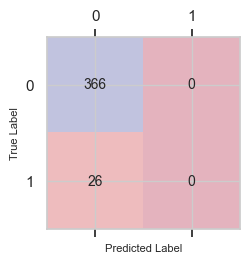

None
Accuracy = 0.934  |Precision = nan  |Sensitivity(recall) = 0.0 |Specificity = 1.0

---------- Running  LogisticRegression()
Confusion Matrix:
 [[336  30]
 [ 23   3]]


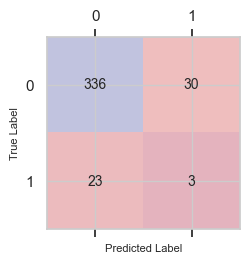

None
Accuracy = 0.865  |Precision = 0.091  |Sensitivity(recall) = 0.115 |Specificity = 0.918

---------- Running  DecisionTreeClassifier()
Confusion Matrix:
 [[344  22]
 [ 18   8]]


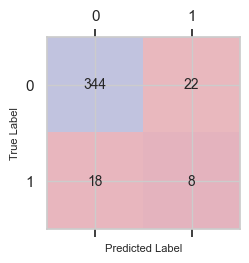

None
Accuracy = 0.898  |Precision = 0.267  |Sensitivity(recall) = 0.308 |Specificity = 0.94

---------- Running  SVC()
Confusion Matrix:
 [[366   0]
 [ 26   0]]


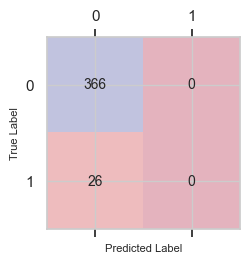

None
Accuracy = 0.934  |Precision = nan  |Sensitivity(recall) = 0.0 |Specificity = 1.0

---------- Running  KNeighborsClassifier()
Confusion Matrix:
 [[364   2]
 [ 25   1]]


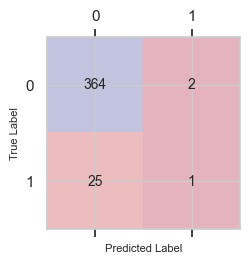

None
Accuracy = 0.931  |Precision = 0.333  |Sensitivity(recall) = 0.038 |Specificity = 0.995

---------- Running  RandomForestClassifier()
Confusion Matrix:
 [[366   0]
 [ 26   0]]


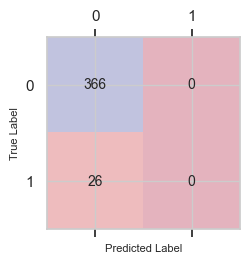

None
Accuracy = 0.934  |Precision = nan  |Sensitivity(recall) = 0.0 |Specificity = 1.0

---------- Running  GradientBoostingClassifier()
Confusion Matrix:
 [[362   4]
 [ 23   3]]


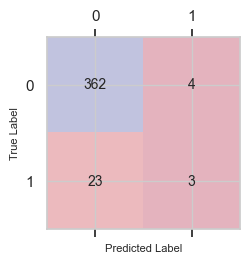

None
Accuracy = 0.931  |Precision = 0.429  |Sensitivity(recall) = 0.115 |Specificity = 0.989

---------- Running  GaussianNB()
Confusion Matrix:
 [[248 118]
 [  6  20]]


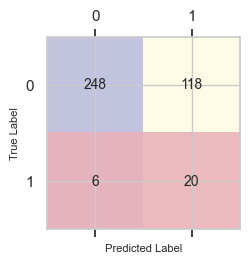

None
Accuracy = 0.684  |Precision = 0.145  |Sensitivity(recall) = 0.769 |Specificity = 0.678


In [72]:
# Baseline Models
classifiers = [DummyClassifier(),
               LogisticRegression(),
               DecisionTreeClassifier(),
               SVC(),
               KNeighborsClassifier(),
               RandomForestClassifier(),
               GradientBoostingClassifier(),
               GaussianNB()
              ]

count = 0

baseline_results = []
for model in classifiers:
    start_time = time.time()
    model = classifiers[count]
    print("\n---------- Running ", model)
    initial_pred = model.fit(X_train, y_train).predict(X_test)
    accuracy, precision, sensitivity, specificity, roc_auc = PrintResults(y_test, initial_pred)
    end_time = time.time()
    elapsed_time = end_time - start_time
    baseline_results.append([model, accuracy, precision, sensitivity, specificity, roc_auc, elapsed_time])
    count = count+1

In [73]:
df_baseline_results = pd.DataFrame(baseline_results, columns=['Model', 'Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'ROC_AUC', 'Run Time'])
df_baseline_results

,Model,Accuracy,Precision,Sensitivity,Specificity,ROC_AUC,Run Time
0,DummyClassifier(),0.934,NaN,0.000,1.000,0.500,0.085117
1,LogisticRegression(),0.865,0.091,0.115,0.918,0.517,0.097761
2,DecisionTreeClassifier(),0.898,0.267,0.308,0.940,0.624,0.531620
3,SVC(),0.934,NaN,0.000,1.000,0.500,0.156781
4,KNeighborsClassifier(),0.931,0.333,0.038,0.995,0.516,0.104822
5,"(DecisionTreeClassifier(max_features='sqrt', r...",0.934,NaN,0.000,1.000,0.500,1.548247
6,([DecisionTreeRegressor(criterion='friedman_ms...,0.931,0.429,0.115,0.989,0.552,6.714897
7,GaussianNB(),0.684,0.145,0.769,0.678,0.723,0.089630


Note
The baseline model's performance is 93.4%. The baseline model is a dummy classifier that makes the majority prediction (in this case a 0 or no) for all rows and calculates accuracy. This is plotted below in the confusion matrix.

## Cross-Validation with KFold

Now do cross validation
Due to run time considerations and given the unbalanced nature of data, I have made the following choices
1. Use of StratifiedKFold, since it is better for unbalanced data.
2. Setting n_splits = 10

In [74]:
# Function to calculate metrics including specificity
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    sensitivity = recall_score(y_true, y_pred, average='weighted', zero_division=0)  # Sensitivity is recall in binary classification context
    
    # Calculate specificity using confusion matrix
    # tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Assuming y_true and y_pred are defined
    cm = confusion_matrix(y_true, y_pred)
    # Flatten the confusion matrix to a one-dimensional array
    cm_flat = cm.ravel()
    # Initialize counts for TN, FP, FN, TP
    tn = fp = fn = tp = 0
    # Unpack the values if the size is correct
    if len(cm_flat) == 4:  # Both classes are present
        tn, fp, fn, tp = cm_flat
    elif len(cm_flat) == 2:  # Only one class is present (e.g., all predictions are negative)
        tn, fp = cm_flat
        fn = tp = 0
    else:
        # Handle cases where no classes are present or unexpected sizes
        print("Unexpected confusion matrix shape:", cm.shape)
    # Now you can use tn, fp, fn, tp as needed
    # print(f"True Negatives: {tn}, False Positives: {fp}, False Negatives: {fn}, True Positives: {tp}")
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero
    
    # ROC AUC requires probabilities; use predict_proba for binary classification
    if len(np.unique(y_true)) == 2:  # Binary classification check
        roc_auc = roc_auc_score(y_true, model.predict_proba(X_fold_val)[:, 1])
    else:
        roc_auc = None  # ROC AUC is not applicable for multi-class without adjustments
    
    return accuracy, precision, sensitivity, specificity, roc_auc

                           Accuracy  Precision  Sensitivity  Specificity  \
Logistic Regression        0.869006   0.888942     0.869006     0.916995   
Decision Tree              0.864689   0.882899     0.864689     0.915826   
Support Vector Classifier  0.933638   0.872293     0.933638     1.000000   
K-Neighbors Classifier     0.931073   0.885032     0.931073     0.994453   
Random Forest              0.933638   0.872293     0.933638     1.000000   
Gradient Boosting          0.915754   0.874206     0.915754     0.979975   
Gaussian Naive Bayes       0.645973   0.893620     0.645973     0.656489   

                            ROC_AUC  
Logistic Regression        0.649571  
Decision Tree              0.531128  
Support Vector Classifier  0.698775  
K-Neighbors Classifier     0.636465  
Random Forest              0.662717  
Gradient Boosting          0.643617  
Gaussian Naive Bayes       0.630513  
Confusion Matrix for Logistic Regression


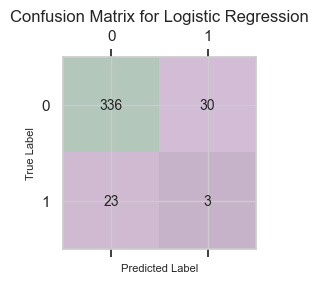

Confusion Matrix for Decision Tree


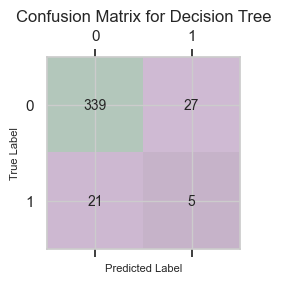

Confusion Matrix for Support Vector Classifier


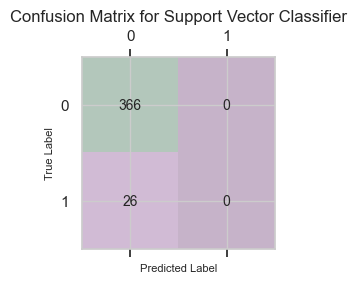

Confusion Matrix for K-Neighbors Classifier


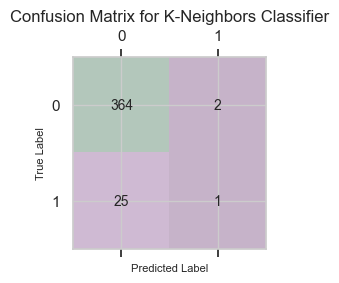

Confusion Matrix for Random Forest


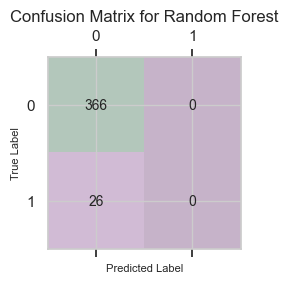

Confusion Matrix for Gradient Boosting


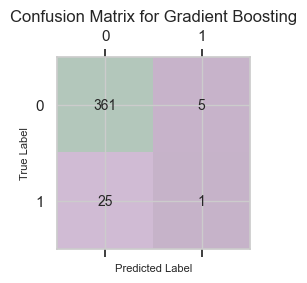

Confusion Matrix for Gaussian Naive Bayes


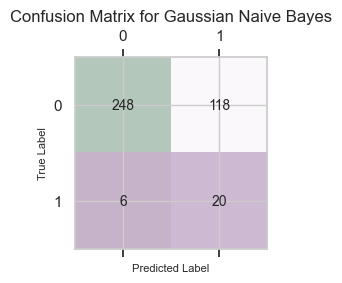

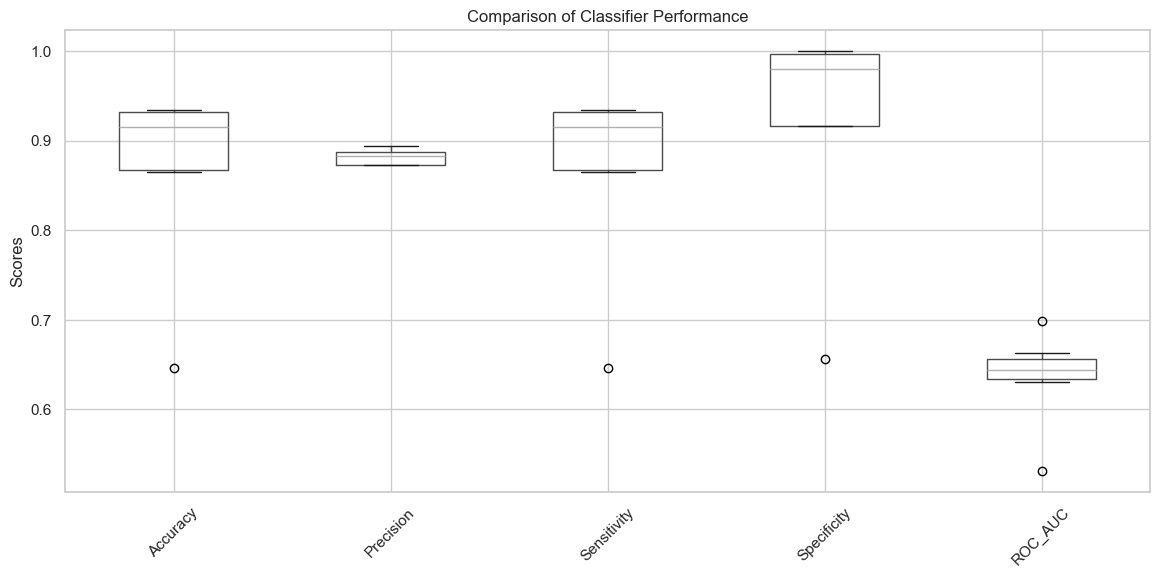

In [75]:
# Define the models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Support Vector Classifier', SVC(probability=True)),  # Enable probability estimates for ROC AUC
    ('K-Neighbors Classifier', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('Gaussian Naive Bayes', GaussianNB())
]

# Prepare to collect results
results = []
names = []

# Evaluate each model using cross-validation and plot confusion matrix
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    
    fold_results = []
    
    for train_index, val_index in kfold.split(X_train):
        # Split data into training and validation sets for this fold using iloc
        X_fold_train = X_train.iloc[train_index]
        X_fold_val = X_train.iloc[val_index]
        y_fold_train = y_train.iloc[train_index]
        y_fold_val = y_train.iloc[val_index]
        
        model.fit(X_fold_train, y_fold_train)
        test_pred = model.predict(X_fold_val)
        
        # Calculate metrics for this fold
        metrics = calculate_metrics(y_fold_val, test_pred)
        fold_results.append(metrics)

    # Average metrics across all folds
    avg_metrics = np.mean(fold_results, axis=0)
    
    results.append(avg_metrics)
    names.append(name)

# Convert results to DataFrame for easier visualization and analysis
results_df = pd.DataFrame(results, columns=['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'ROC_AUC'], index=names)

# Print the results DataFrame
print(results_df)

# Plotting confusion matrix for each model after training on full training set (optional)
for name, model in models:
    model.fit(X_train, y_train)  # Fit on the entire training set for final predictions
    y_pred_final = model.predict(X_test)  # Predict on the test set
    
    cm = confusion_matrix(y_test, y_pred_final)  # Compute confusion matrix
    print(f'Confusion Matrix for {name}')
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    # ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    ax.matshow(cm, cmap=plt.cm.PRGn, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i, s=cm[i,j], va='center', ha='center', fontsize=10)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label', fontsize=8)
    plt.ylabel('True Label', fontsize=8)
    plt.show()

# Boxplot for visual comparison of model performance (optional)
plt.figure(figsize=(14, 6))
results_df[['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'ROC_AUC']].boxplot()
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title('Comparison of Classifier Performance')
plt.ylabel('Scores')
plt.show()

## Model Parameter Tuning


Model parameter tuning for the models that performed the best - SVM KNN and RFC

In [76]:
# Define parameter grids
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['rbf', 'linear']
}

knn_param_grid = {
    'n_neighbors': range(1, 10),
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

rf_param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=200, stop=2000, num=10)],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create classifiers
svm = SVC()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

# Create GridSearchCV objects
svm_grid = GridSearchCV(svm, svm_param_grid, cv=5, n_jobs=-1)
knn_grid = GridSearchCV(knn, knn_param_grid, cv=5, n_jobs=-1)
rf_random = RandomizedSearchCV(rf, rf_param_grid, n_iter=20, cv=5, n_jobs=-1, random_state=42)

# Fit the models
svm_grid.fit(X_train, y_train)
knn_grid.fit(X_train, y_train)
rf_random.fit(X_train, y_train)

# Get best models
best_svm = svm_grid.best_estimator_
best_knn = knn_grid.best_estimator_
best_rf = rf_random.best_estimator_

# Make predictions
y_pred_svm = best_svm.predict(X_test)
y_pred_knn = best_knn.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

# Evaluate models
models = [
    ("SVM", best_svm, y_pred_svm),
    ("KNN", best_knn, y_pred_knn),
    ("Random Forest", best_rf, y_pred_rf)
]

# Create a list to store results
results = []

for name, model, y_pred in models:
    print(f"\n{name} Results:")
    print(f"Best Parameters: {model.get_params()}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Store results in a dictionary
    result = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-score': f1_score(y_test, y_pred, average='weighted'),
        'Best Parameters': str(model.get_params())
    }
    results.append(result)

# Create DataFrame from results
df_final_results = pd.DataFrame(results)

# Display the DataFrame
print("\nFinal Results DataFrame:")
print(df_final_results)

# Save the DataFrame to a CSV file
df_final_results.to_csv('capstone_results.csv', index=False)


SVM Results:
Best Parameters: {'C': 0.1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Accuracy: 0.9337
Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97       366
         1.0       0.00      0.00      0.00        26

    accuracy                           0.93       392
   macro avg       0.47      0.50      0.48       392
weighted avg       0.87      0.93      0.90       392


KNN Results:
Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}
Accuracy: 0.9260
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      

## Final Result 

Support Vector Machines (SVM) classifier performed the best for this wafer fab yield problem. Random Forest produced similar results but had a significantly higher run time (not reported here). The recommendation is to use SVM with the best parameter reported above

|         Method         |   Accuracy   |  Precision  |   Recall   |   F1-score   |
|------------------------|--------------|-------------|------------|--------------|  
|Support Vector Machines |    0.9337    |    0.93     |    1.00    |     0.96     |  
|KNearest Neighbors      |    0.9260    |    0.94     |    0.99    |     0.97     |  
|Random Forest           |    0.9337    |    0.93     |    1.00    |     0.97     |  



## Future Work  
  
The results of this project significantly highlight the effectiveness of the techniques used. Here are a few next steps to improve this further.  
1. Implement more classifiers, including ensemble and neural network methods.  
2. Modularize the function definitions and plotting for wider applicability.  
3. Implement oversampling methods to address any bias due to the unbalanced dataset.    
4. Find similar datasets and apply this project to them.  
5. Find applicability for this project in my work place.  